In [1]:
#PHY 80 W23
#Lab 12: Curve Fitting (16/02/23)
#Lab Partners: Ravi Kini, Sam Wu (Individual work of Ravi Kini)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import optimize
from scipy.stats import binom, poisson, norm

### 12.1

best fit value of a:  4.35714
best fit value of b:  16.5


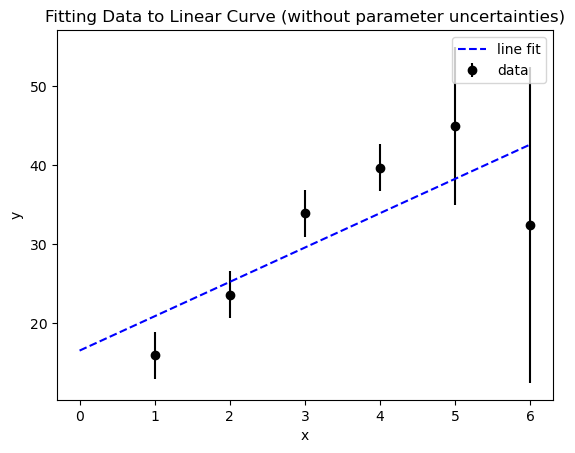

In [2]:
def line_func(x, a, b):
    return x * a + b

x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y_data = np.array([15.9, 23.6, 33.9, 39.7, 45.0, 32.4])
y_unc = np.array([3.0, 3.0, 3.0, 3.0, 10.0, 20.0])

plt.errorbar(x_data, y_data, yerr=y_unc, fmt="ko", label="data")

guess_a = 1.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, x_data, y_data, p0=[guess_a, guess_b])

fit_a = par[0]
fit_b = par[1]
print("best fit value of a: ", round(fit_a, 5))
print("best fit value of b: ", round(fit_b, 5))

xf = np.linspace(0.0, 6.0, 100)
yf = fit_b + fit_a * xf
plt.plot(xf, yf, "b--", label="line fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Fitting Data to Linear Curve (without parameter uncertainties)")
plt.show()
#this linear fit does not track the better-constrained points very closely,
#as it is thrown off by the data point with a large uncertainty

### 12.2

In [3]:
chi_squared = np.sum(((line_func(x_data, fit_a, fit_b) - y_data)/y_unc)**2)
print("chi squared value: ", round(chi_squared, 5))
print("reduced chi squared value: ", round(chi_squared/(len(x_data) - 2), 5))
#the reduced chi squared value for a function that has been fitted to N data points is 1,
#so as the reduced chi squared value is significantly larger than this value,
#the fit is not reasonable

chi squared value:  9.5159
reduced chi squared value:  2.37897


### 12.3

best fit value of a:  7.70673
best fit value of b:  8.82755


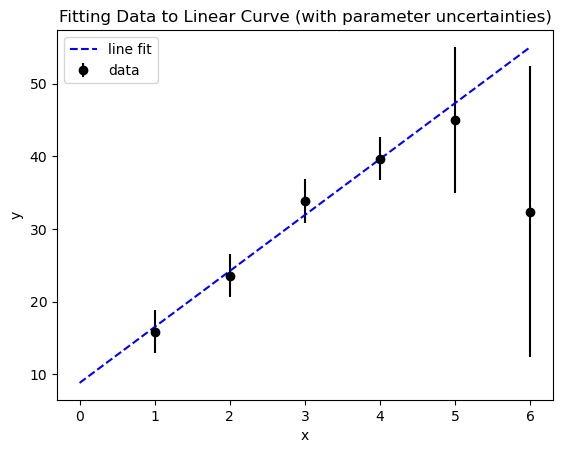

In [4]:
plt.errorbar(x_data, y_data, yerr=y_unc, fmt="ko", label="data")

guess_a = 1.0
guess_b = 0.0
par, cov = optimize.curve_fit(line_func, x_data, y_data, sigma=y_unc, p0=[guess_a, guess_b])

fit_a = par[0]
fit_b = par[1]
print("best fit value of a: ", round(fit_a, 5))
print("best fit value of b: ", round(fit_b, 5))

xf = np.linspace(0.0, 6.0, 100)
yf = fit_b + fit_a * xf
plt.plot(xf, yf, "b--", label="line fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Fitting Data to Linear Curve (with parameter uncertainties)")
plt.show()
#this linear fit tracks the better-constrained points more closely than the
#fit that did not account for parameter uncertainties

### 12.4

In [5]:
chi_squared = np.sum(((line_func(x_data, fit_a, fit_b) - y_data)/y_unc)**2)
print("chi squared value: ", round(chi_squared, 5))
print("reduced chi squared value: ", round(chi_squared/(len(x_data) - 2), 5))
#the reduced chi squared value for a function that has been fitted to N data points is 1,
#so as the reduced chi squared value is significantly closer to this value than the fit
#not using parameter uncertainties, the fit is reasonable

chi squared value:  1.85441
reduced chi squared value:  0.4636


### 12.5

In [6]:
def constant_func(x, a):
    return a

x_data = np.arange(100)
y_data = np.random.normal(50.0, 10.0, size=100)
y_unc = np.full(y_data.shape, 10)

guess_a = 0.0
par, cov = optimize.curve_fit(constant_func, x_data, y_data, sigma=y_unc, p0=[guess_a], absolute_sigma=True)

unc = np.sqrt(np.diag(cov))
fit_a = par[0]
unc_a = unc[0]

print("mean of x data: ", round(np.mean(y_data), 5))
print("fitted constant: ", round(fit_a, 5))
print("uncertainty: ", round(unc_a, 5))
#the uncertainty is 1.0

mean of x data:  48.69535
fitted constant:  48.69535
uncertainty:  1.0


### 12.6

In [7]:
x_data = np.arange(100)
y_data = np.random.normal(50.0, 10.0, size=100)

guess_a = 0.0
par, cov = optimize.curve_fit(constant_func, x_data, y_data, p0=[guess_a], absolute_sigma=True)

unc = np.sqrt(np.diag(cov))
fit_a = par[0]
unc_a = unc[0]

print("mean of x data: ", round(np.mean(y_data), 5))
print("fitted constant: ", round(fit_a, 5))
print("uncertainty: ", round(unc_a, 5))
#the uncertainty is 0.1
#this makes sense, as the uncertainty of the mean of the normal distribution
#is the width divided by the square root of the number of data points, which in this case is
#1 (the assumed value for the parameter uncertainties) divided by sqrt(100), yielding 0.1

mean of x data:  48.56429
fitted constant:  48.56429
uncertainty:  0.1


### 12.7

best fit value of A:  19.94984
uncertainty of A:  0.87846
best fit value of k:  0.899
uncertainty of k:  0.0072


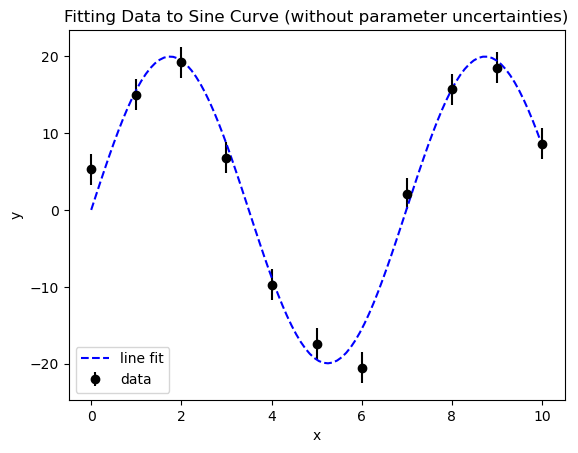

In [8]:
def sine_func(x, A, k):
    return A * np.sin(k * x)

x_data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_data = np.array([5.3, 15.0, 19.2, 6.8, -9.7, -17.4, -20.5, 2.1, 15.7, 18.5, 8.6])
y_unc = np.full(y_data.shape, 2)

plt.errorbar(x_data, y_data, yerr=y_unc, fmt="ko", label="data")

guess_A = 20.0
guess_k = 1.0
par, cov = optimize.curve_fit(sine_func, x_data, y_data, sigma=y_unc, p0=[guess_A, guess_k], absolute_sigma=True)
unc = np.sqrt(np.diag(cov))

fit_A = par[0]
unc_A = unc[0]
fit_k = par[1]
unc_k = unc[1]
print("best fit value of A: ", round(fit_A, 5))
print("uncertainty of A: ", round(unc_A, 5))
print("best fit value of k: ", round(fit_k, 5))
print("uncertainty of k: ", round(unc_k, 5))

xf = np.linspace(0.0, 10.0, 100)
yf = fit_A * np.sin(fit_k * xf)
plt.plot(xf, yf, "b--", label="line fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Fitting Data to Sine Curve (without parameter uncertainties)")
plt.show()

### 12.8

In [9]:
chi_squared = np.sum(((sine_func(x_data, fit_A, fit_k) - y_data)/y_unc)**2)
print("chi squared value: ", round(chi_squared, 5))
print("reduced chi squared value: ", round(chi_squared/(len(x_data) - 2), 5))
#the reduced chi squared value for a function that has been fitted to N data points is 1,
#so as the reduced chi squared value is reasonably close to this value, the fit is reasonable

chi squared value:  16.61272
reduced chi squared value:  1.84586
